# Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

In [1]:
import pandas as pd
import numpy as np
import warnings        # Filtering any warning message from the subsequent noebooks
warnings.filterwarnings("ignore")

# Reading and Understanding the Data

In [2]:
crime = pd.read_csv(r'C:\Users\mukes\OneDrive\Desktop\Data Science\Assignments\Clustering Assign\crime_data.csv')
crime.head(2)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5


Our dataset consists of crime rates for Murder, Assault, UrbanPop and Rape

In [3]:
crime.shape

(50, 5)

In [5]:
crime.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

We have no missing values!

In [6]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [7]:
crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [3]:
# Renaming the column Unnmaed as State.
crime = crime.rename(columns={'Unnamed: 0':'State'})
crime.columns

Index(['State', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

# 1. Murder Rate

<Axes: xlabel='State'>

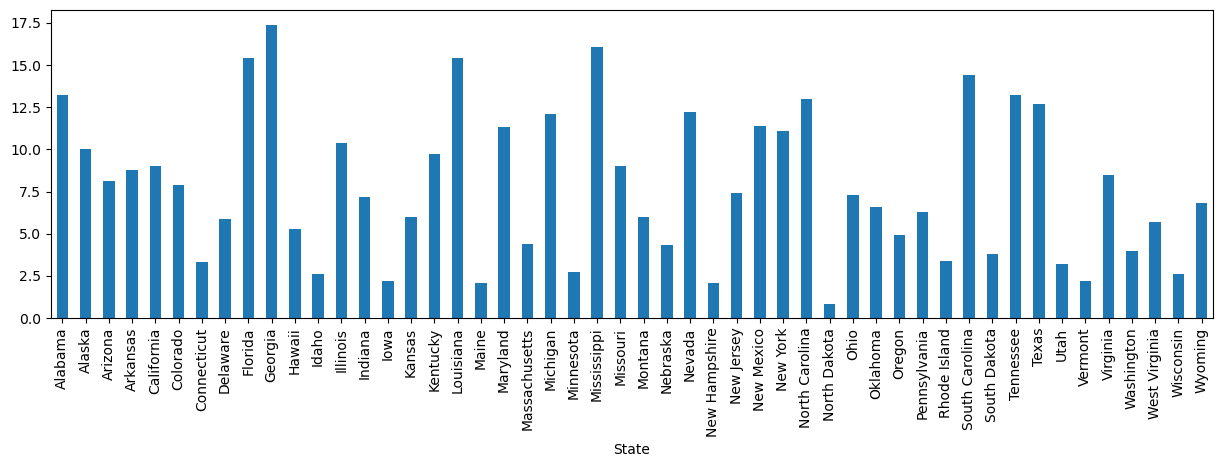

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,4))
crime.groupby('State')['Murder'].max().plot(kind='bar')

1. Highest Murder Rate: Georgia
2. Lowest Murder Rate: Noth Dakota

# 2. Assualt Rate

<Axes: xlabel='State'>

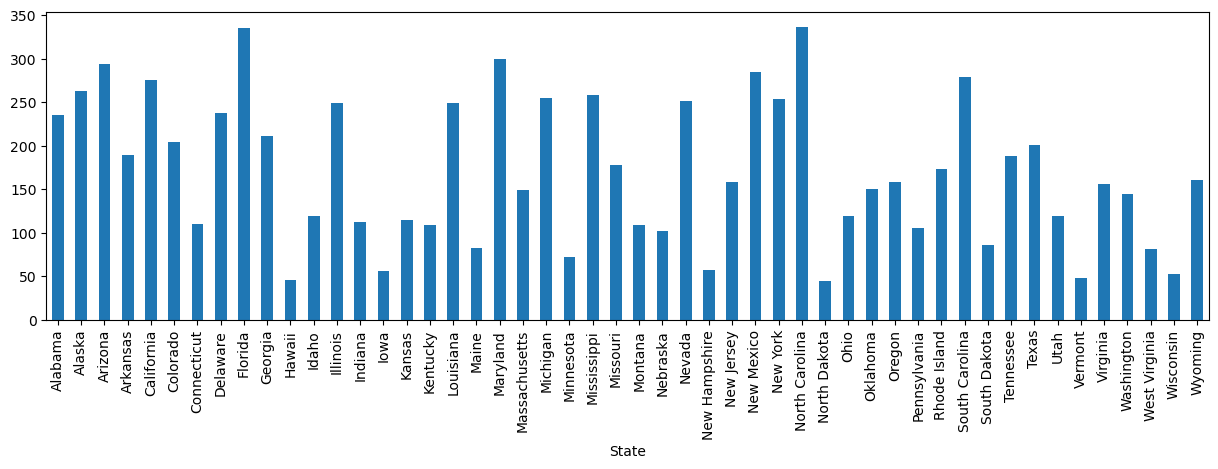

In [10]:
plt.figure(figsize=(15,4))
crime.groupby('State')['Assault'].max().plot(kind='bar')

1. Highest Assualt Rate: Florida and North Carolina
2. Lowest Assualt Rate : Hawaii and North dakota

# 3. Rape Rate

<Axes: xlabel='State'>

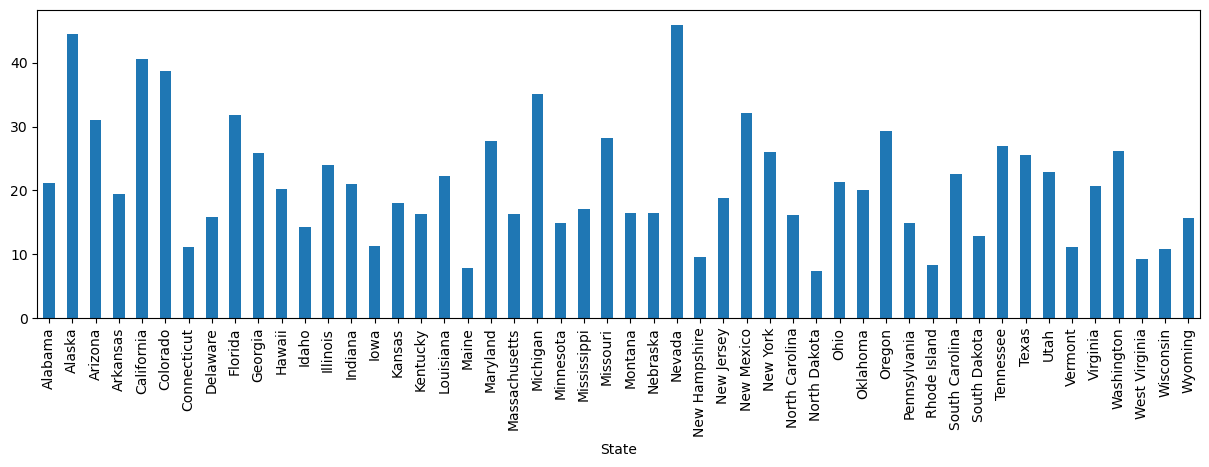

In [11]:
plt.figure(figsize=(15,4))
crime.groupby('State')['Rape'].max().plot(kind='bar')

1. Highest Rape Rate: Nevada
2. Lowest rape Rate : North Dakota

# 4. UrbanPop : Percent Urban Population

<Axes: xlabel='State'>

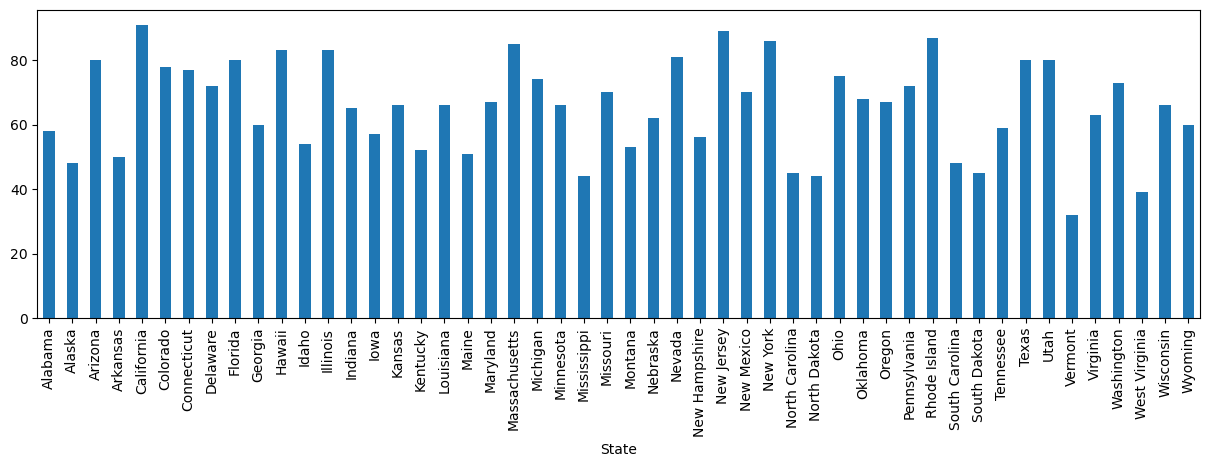

In [12]:
plt.figure(figsize=(15,4))
crime.groupby('State')['UrbanPop'].max().plot(kind='bar')

1. Highest Urban Pop: North Carolina and New Jersey
2. Lowest Urban Pop : Vermont

Text(0, 0.5, 'Murder Rate')

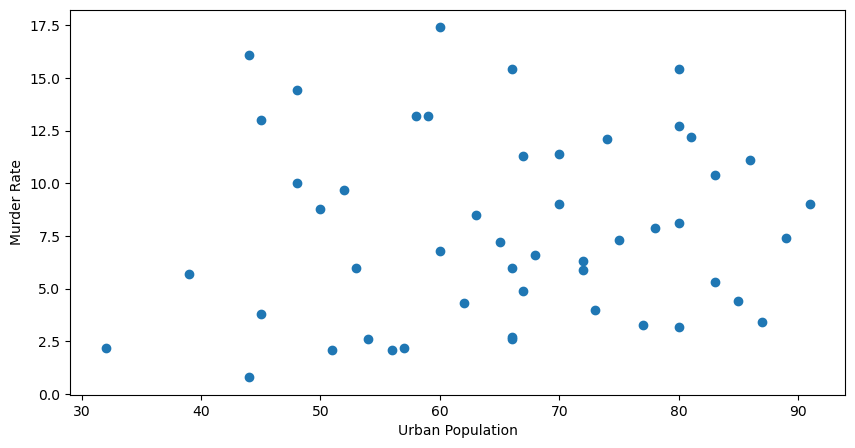

In [5]:
plt.figure(figsize=(10,5))
plt.scatter('UrbanPop','Murder',data=crime)
plt.xlabel('Urban Population')
plt.ylabel('Murder Rate')

Text(0, 0.5, 'Assault Rate')

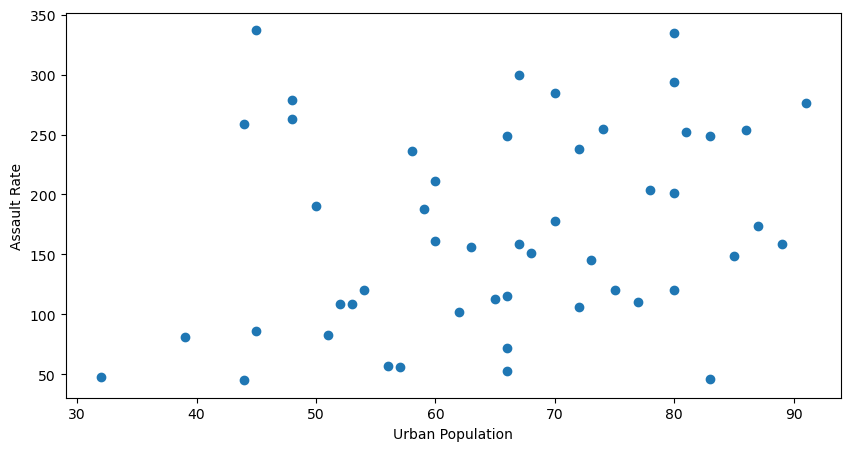

In [14]:
plt.figure(figsize=(10,5))
plt.scatter('UrbanPop','Assault',data=crime)
plt.xlabel('Urban Population')
plt.ylabel('Assault Rate')

Text(0, 0.5, 'Rape Rate')

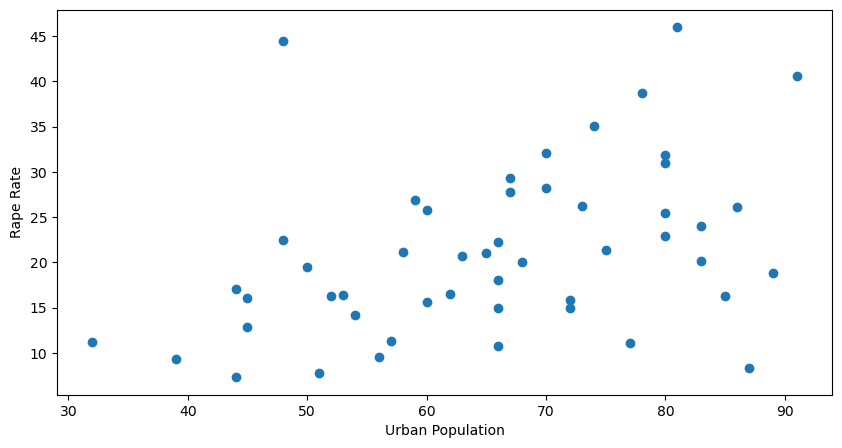

In [15]:
plt.figure(figsize=(10,5))
plt.scatter('UrbanPop','Rape',data=crime)
plt.xlabel('Urban Population')
plt.ylabel('Rape Rate')

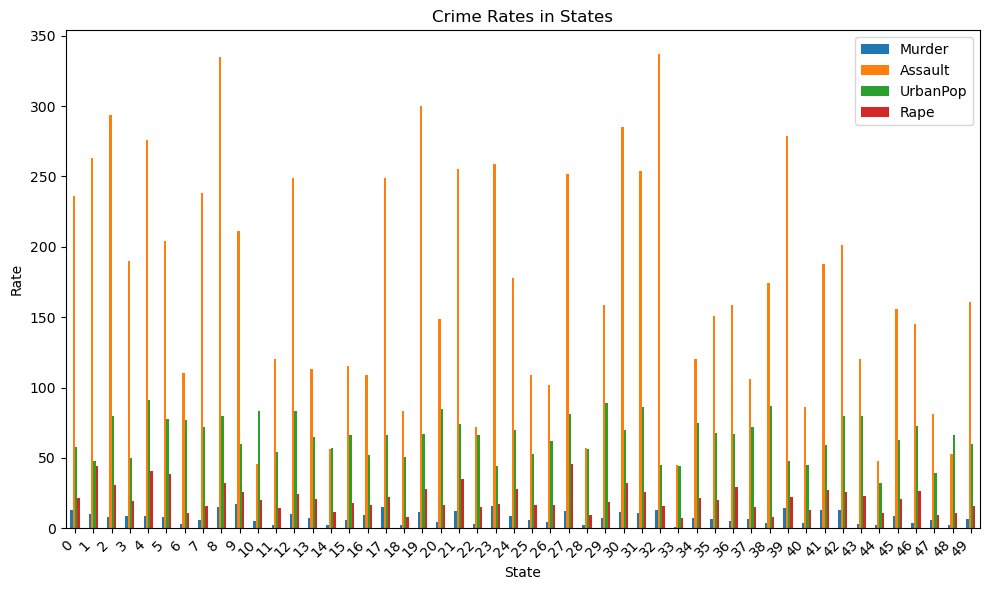

In [16]:
# Plot grouped bar chart
crime.plot(kind='bar', figsize=(10, 6))
plt.xlabel('State')
plt.ylabel('Rate')
plt.title('Crime Rates in States')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

From the Bar Plot, most number of crime is Assualting across maximum number of States.

# Normalizing data Clustering

In [6]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)
# Normalized data frame (considering the numerical part of data)
crime_norm = norm_func(crime.iloc[:,1:])
print(crime_norm)

      Murder   Assault  UrbanPop      Rape
0   0.746988  0.654110  0.440678  0.359173
1   0.554217  0.746575  0.271186  0.961240
2   0.439759  0.852740  0.813559  0.612403
3   0.481928  0.496575  0.305085  0.315245
4   0.493976  0.791096  1.000000  0.860465
5   0.427711  0.544521  0.779661  0.811370
6   0.150602  0.222603  0.762712  0.098191
7   0.307229  0.660959  0.677966  0.219638
8   0.879518  0.993151  0.813559  0.635659
9   1.000000  0.568493  0.474576  0.478036
10  0.271084  0.003425  0.864407  0.333333
11  0.108434  0.256849  0.372881  0.178295
12  0.578313  0.698630  0.864407  0.431525
13  0.385542  0.232877  0.559322  0.354005
14  0.084337  0.037671  0.423729  0.103359
15  0.313253  0.239726  0.576271  0.276486
16  0.536145  0.219178  0.338983  0.232558
17  0.879518  0.698630  0.576271  0.385013
18  0.078313  0.130137  0.322034  0.012920
19  0.632530  0.873288  0.593220  0.529716
20  0.216867  0.356164  0.898305  0.232558
21  0.680723  0.719178  0.711864  0.718346
22  0.11445

# K Means Clustering using Elbow Method

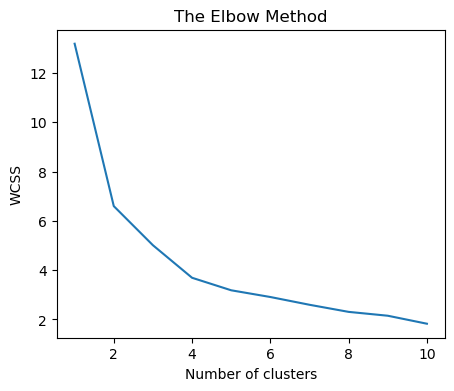

In [32]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(5, 4))
wcss = []    # (WCSS): within-cluster sum of squares 
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)   
    # Creates a k-means clustering model with a specified number of clusters (k).
    kmeans.fit(crime_norm)       # 'crime_norm' is the normalized data
    wcss.append(kmeans.inertia_)     # criterion based on which K-means clustering works
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')     # Scree plot is a plot between WCSS (Within cluster sum of squares) and a number of clusters.
plt.show()

According to the plot, bend is at 4, which signifies the data would be distributed between four clusters. Therefore, 4 is the cluster size.

# Building Model using K Value

In [20]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

# Performing clustering and get cluster assignments for each data point
y_kmeans = kmeans.fit_predict(crime_norm)     

# Display the cluster assignments
y_kmeans 

array([2, 1, 1, 2, 1, 1, 3, 3, 1, 2, 3, 0, 1, 3, 0, 3, 0, 2, 0, 1, 3, 1,
       0, 2, 3, 0, 0, 1, 0, 3, 1, 1, 2, 0, 3, 3, 3, 3, 3, 2, 0, 2, 1, 3,
       0, 3, 3, 0, 0, 3])

In [21]:
# beginning of the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans+1
 
# New list called cluster
cluster = list(y_kmeans1)
# Adding cluster to our data set
crime['cluster'] = cluster

In [27]:
# Mean of clusters 1 to 4
kmeans_mean_cluster = pd.DataFrame(round(crime.groupby('cluster').mean(),1))  
kmeans_mean_cluster     # Displaying the mean cluster values

crime.iloc[:,1:].groupby(crime.cluster).mean()

,Murder,Assault,UrbanPop,Rape,cluster
cluster,,,,,
1,3.600000,78.538462,52.076923,12.176923,1.0
2,10.966667,264.000000,76.500000,33.608333,2.0
3,13.937500,243.625000,53.750000,21.412500,3.0
4,5.852941,141.176471,73.647059,19.335294,4.0


Calculating the mean of each cluster based on the clustering results (y_kmeans)

## kmeans_mean_cluster dataframe  showing all the clusters with their respective crimes

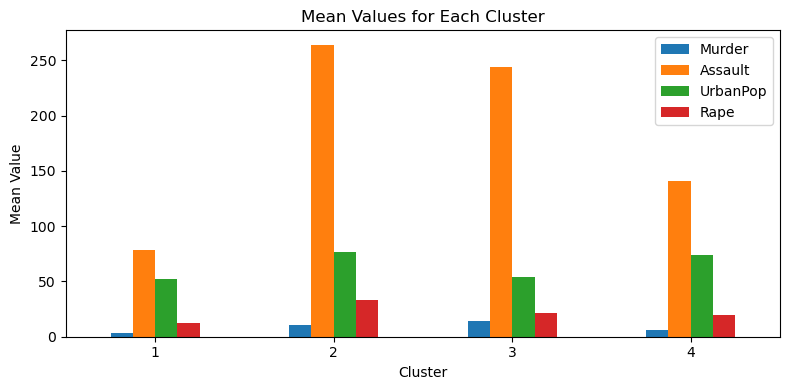

In [29]:
kmeans_mean_cluster.plot(kind='bar', figsize=(8, 4))
plt.xlabel('Cluster')
plt.ylabel('Mean Value')
plt.title('Mean Values for Each Cluster')
plt.xticks(rotation=0)  
plt.tight_layout()
plt.show()

In [30]:
kmeans.cluster_centers_

array([[0.1686747 , 0.11485774, 0.34028683, 0.12601868],
       [0.6124498 , 0.75      , 0.75423729, 0.67980189],
       [0.79141566, 0.6802226 , 0.36864407, 0.36466408],
       [0.30439405, 0.32937147, 0.70588235, 0.31098951]])

In [33]:
ks = pd.Series(y_kmeans) 
crime['cluster']
crime

,State,Murder,Assault,UrbanPop,Rape,cluster,clust
0,Alabama,13.2,236,58,21.2,2,2
1,Alaska,10.0,263,48,44.5,1,1
2,Arizona,8.1,294,80,31.0,1,1
3,Arkansas,8.8,190,50,19.5,2,2
4,California,9.0,276,91,40.6,1,1
5,Colorado,7.9,204,78,38.7,1,1
6,Connecticut,3.3,110,77,11.1,3,3
7,Delaware,5.9,238,72,15.8,3,3
8,Florida,15.4,335,80,31.9,1,1
9,Georgia,17.4,211,60,25.8,2,2


# Following are the Different states in each cluster

In [34]:
k_cluster_0 = crime[(crime.clust==0)]
k_cluster_0

,State,Murder,Assault,UrbanPop,Rape,cluster,clust
11,Idaho,2.6,120,54,14.2,0,0
14,Iowa,2.2,56,57,11.3,0,0
16,Kentucky,9.7,109,52,16.3,0,0
18,Maine,2.1,83,51,7.8,0,0
22,Minnesota,2.7,72,66,14.9,0,0
25,Montana,6.0,109,53,16.4,0,0
26,Nebraska,4.3,102,62,16.5,0,0
28,New Hampshire,2.1,57,56,9.5,0,0
33,North Dakota,0.8,45,44,7.3,0,0
40,South Dakota,3.8,86,45,12.8,0,0


In [66]:
k_cluster_0.shape[0]

13

In [35]:
k_cluster_1 = crime[(crime.clust==1)]
k_cluster_1 

,State,Murder,Assault,UrbanPop,Rape,cluster,clust
1,Alaska,10.0,263,48,44.5,1,1
2,Arizona,8.1,294,80,31.0,1,1
4,California,9.0,276,91,40.6,1,1
5,Colorado,7.9,204,78,38.7,1,1
8,Florida,15.4,335,80,31.9,1,1
12,Illinois,10.4,249,83,24.0,1,1
19,Maryland,11.3,300,67,27.8,1,1
21,Michigan,12.1,255,74,35.1,1,1
27,Nevada,12.2,252,81,46.0,1,1
30,New Mexico,11.4,285,70,32.1,1,1


In [67]:
k_cluster_1.shape[0]

12

In [36]:
k_cluster_2 = crime[(crime.clust==2)]
k_cluster_2

,State,Murder,Assault,UrbanPop,Rape,cluster,clust
0,Alabama,13.2,236,58,21.2,2,2
3,Arkansas,8.8,190,50,19.5,2,2
9,Georgia,17.4,211,60,25.8,2,2
17,Louisiana,15.4,249,66,22.2,2,2
23,Mississippi,16.1,259,44,17.1,2,2
32,North Carolina,13.0,337,45,16.1,2,2
39,South Carolina,14.4,279,48,22.5,2,2
41,Tennessee,13.2,188,59,26.9,2,2


In [68]:
k_cluster_2.shape[0]

8

In [37]:
k_cluster_3 = crime[(crime.clust==3)]
k_cluster_3

,State,Murder,Assault,UrbanPop,Rape,cluster,clust
6,Connecticut,3.3,110,77,11.1,3,3
7,Delaware,5.9,238,72,15.8,3,3
10,Hawaii,5.3,46,83,20.2,3,3
13,Indiana,7.2,113,65,21.0,3,3
15,Kansas,6.0,115,66,18.0,3,3
20,Massachusetts,4.4,149,85,16.3,3,3
24,Missouri,9.0,178,70,28.2,3,3
29,New Jersey,7.4,159,89,18.8,3,3
34,Ohio,7.3,120,75,21.4,3,3
35,Oklahoma,6.6,151,68,20.0,3,3


In [69]:
k_cluster_3.shape[0]

17

# Hierarchical Clustering

# 1. Single Leakage

Text(0, 0.5, 'Euclidean distances')

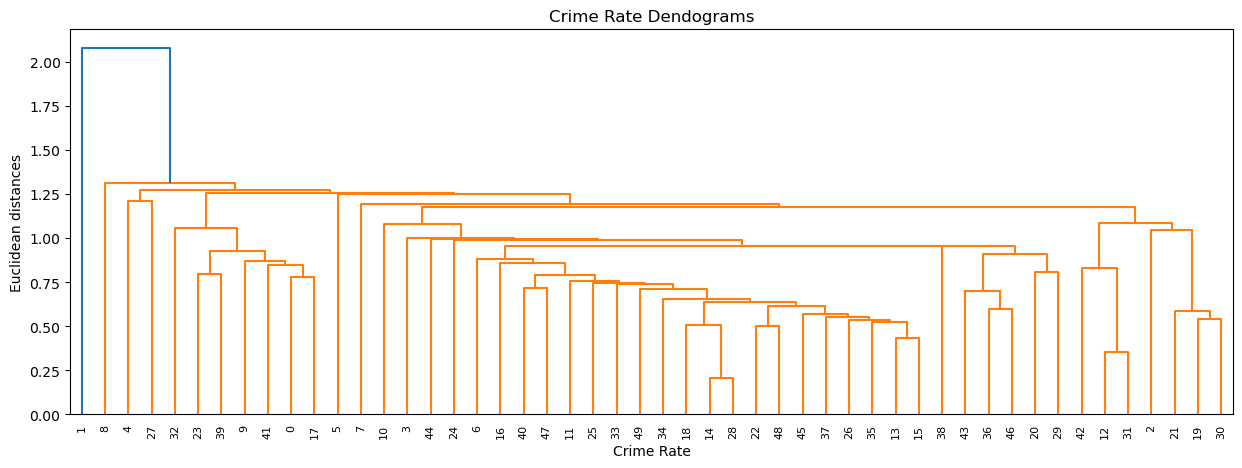

In [38]:
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler  

scaler = StandardScaler()
scaled_data = scaler.fit_transform(crime_norm)
plt.figure(figsize=(15,5))
plt.title("Crime Rate Dendograms")
dend = sch.dendrogram(sch.linkage(scaled_data, method='single'))
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean distances')

Single Linkage: The shortest distance between any two points in the two clusters

# 2. Complete Linkage

Text(0, 0.5, 'Euclidean distances')

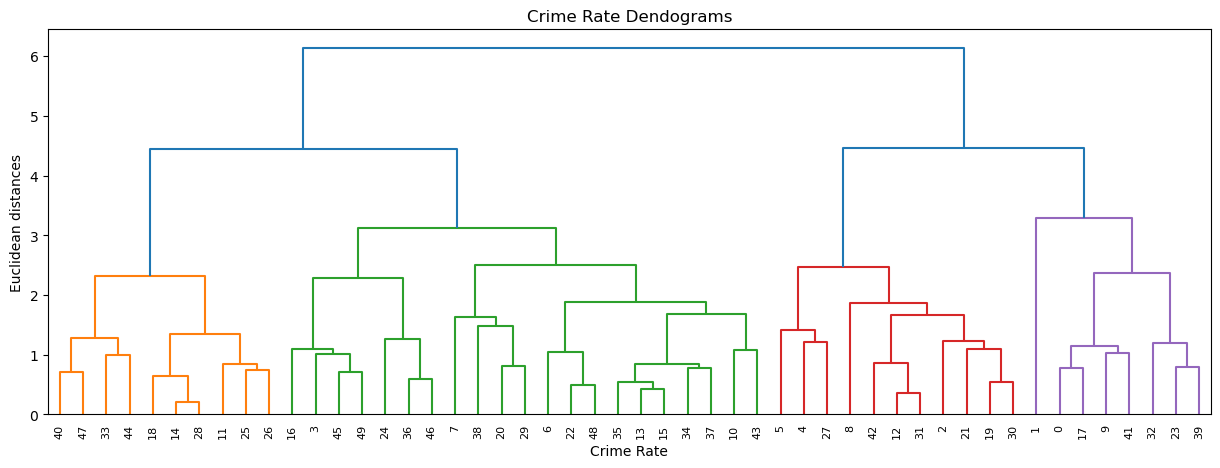

In [39]:
plt.figure(figsize=(15,5))
plt.title("Crime Rate Dendograms")
dend = sch.dendrogram(sch.linkage(scaled_data, method='complete'))
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean distances)

Complete Package: The longest distance between any two points in the two clusters

# 3. Average Linkage

Text(0, 0.5, 'Euclidean distances')

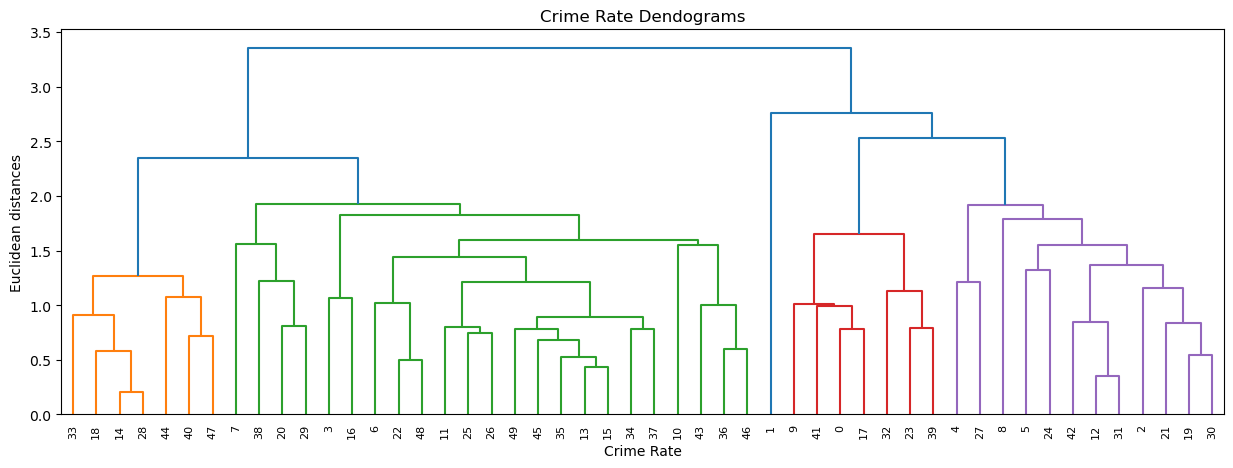

In [40]:
plt.figure(figsize=(15,5))
plt.title("Crime Rate Dendograms")
dend = sch.dendrogram(sch.linkage(scaled_data, method='average'))
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean distances')

Average Package: The average distance between all pairs of points in the two clusters

# 4. Ward

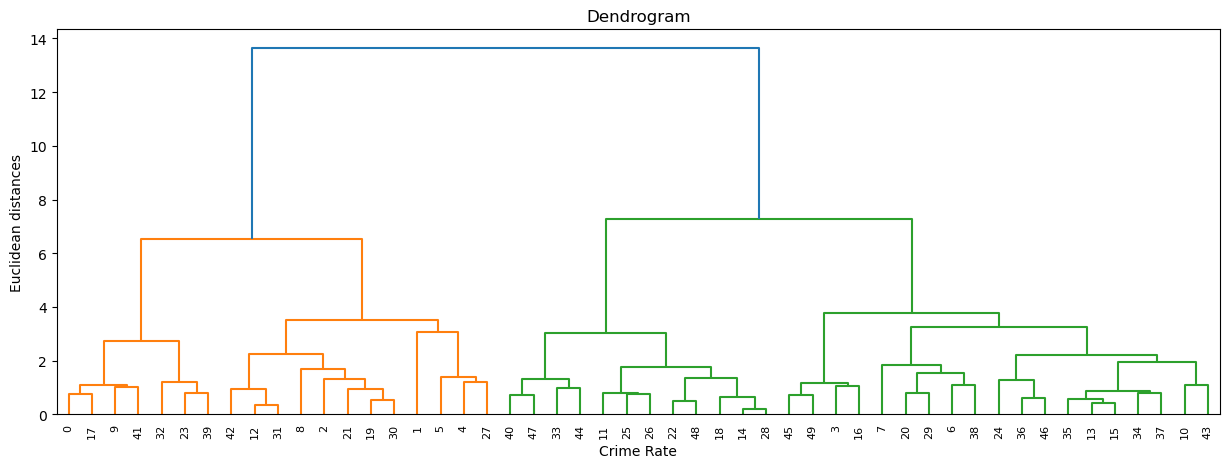

In [41]:
# With Ward method
plt.figure(figsize=(15,5))
dendrogram = sch.dendrogram(sch.linkage(scaled_data, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean distances')
plt.show()

1. Minimizing the variance within the clusters. It tends to produce clusters of similar sizes.
2. Cluster number is 3 for this dataset.

In [42]:
from sklearn.cluster import AgglomerativeClustering

# Fit the Agglomerative Clustering
AC = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='ward')

In [43]:
# Fit and predict to have the cluster labels.
y_pred =AC.fit_predict(crime_norm)
y_pred

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0,
       2, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1,
       2, 1, 1, 2, 2, 1], dtype=int64)

In [44]:
# Fetch the cluster labels or creating a new column named 'cluster labels' in the DataFrame
crime['cluster labels']= y_pred

# Estimation of the States falling in different Clusters

In [45]:
crime[['State','cluster labels']]

,State,cluster labels
0,Alabama,0
1,Alaska,0
2,Arizona,0
3,Arkansas,1
4,California,0
5,Colorado,0
6,Connecticut,1
7,Delaware,1
8,Florida,0
9,Georgia,0


In [59]:
Cluster_0 = crime.groupby('cluster labels')['State'].unique()[0]
Cluster_0

array(['Alabama', 'Alaska', 'Arizona', 'California', 'Colorado',
       'Florida', 'Georgia', 'Illinois', 'Louisiana', 'Maryland',
       'Michigan', 'Mississippi', 'Missouri', 'Nevada', 'New Mexico',
       'New York', 'North Carolina', 'South Carolina', 'Tennessee',
       'Texas'], dtype=object)

In [60]:
Cluster_0.shape[0]

20

In [61]:
Cluster_1= crime.groupby('cluster labels')['State'].unique()[1]
Cluster_1

array(['Arkansas', 'Connecticut', 'Delaware', 'Hawaii', 'Indiana',
       'Kansas', 'Kentucky', 'Massachusetts', 'New Jersey', 'Ohio',
       'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'Utah',
       'Virginia', 'Washington', 'Wyoming'], dtype=object)

In [62]:
Cluster_1.shape[0]

18

In [63]:
Cluster_2 = crime.groupby('cluster labels')['State'].unique()[2]
Cluster_2

array(['Idaho', 'Iowa', 'Maine', 'Minnesota', 'Montana', 'Nebraska',
       'New Hampshire', 'North Dakota', 'South Dakota', 'Vermont',
       'West Virginia', 'Wisconsin'], dtype=object)

In [64]:
Cluster_2.shape[0]

12

# DBSCAN Clustering

In [70]:
# Importing necessary Libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [73]:
array = crime.values

In [76]:
# Normalized data frame (considering the numerical part of data)
crime_norm = norm_func(crime.iloc[:,1:])
# print(crime_norm)

In [77]:
dbscan2 = DBSCAN(eps=0.98, min_samples=3)
dbscan2.fit(crime_norm)

# DBSCAN(eps=0.5, min_samples=5): This creates a DBSCAN model with a maximum distance (eps) of 0.5 and a minimum number of 
# samples required to form a dense region (min_samples) set to 5. 
# y_pred = dbscan_model.fit_predict(X)

DBSCAN(eps=0.98, min_samples=3)

In [80]:
# min_samples=(no. of Dimensions/columns)+1
d_cluster = DBSCAN(eps=1.25, min_samples=5)
d_cluster.fit(crime_norm) 
d_cluster.labels_ 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

# CONCLUSION

From the above 3 methods, we can come to conclusion stating that Kmeans Clustering seems to be the most reliable one as and 
secondly Hierarchical Clustering Analysis.

1. Murder: Cluster_1 has got the least number of Murders and Cluster_3 has got the most number of Murders.
2. Assault: Cluster_1 seems to be the least States of getting Assault and Cluster_2 the most.
3. Rape: Cluster_1 again reported to be the least number of the Rape rates in the country, and most number in Cluster_2.
4. As observed, Cluster_1 is found to be the least States with less number of Crime rates.
5. Cluster_2 is found to be the most violent places in the Country.
6. So, we can conclude stating that Cluster_1 is the Safest one to stay with States North Dakota, Lowa, New Hampshire, etc and 
   Cluster_2 such as Alaska, Nevada, etc are the most dangerous places. While Cluster_3 and Cluster_4 falls under moderate zone.